In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fl
df=pd.read_csv(r"C:\Users\rishy\Desktop\rr\911.csv")
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df['day_of_week'] = df['timeStamp'].dt.day_name()

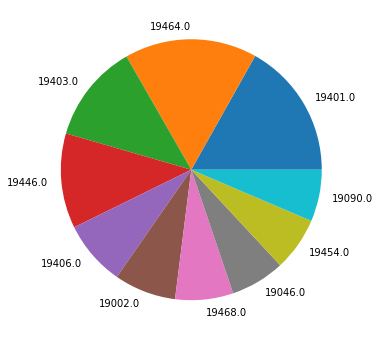

In [3]:
zip10=df.groupby('zip').size()
zip10=zip10.sort_values( ascending=False).head(10)
plt.figure(figsize=(6,6))
plt.pie(zip10.values,labels=zip10.index)
plt.show()
#Question 1: Are Zipcodes 19446 and 19090 present ?
#as we can see they are present

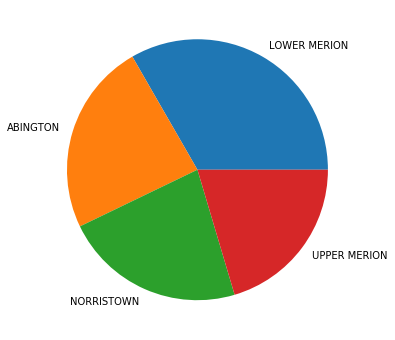

In [4]:
tw4=df.groupby('twp').size()
tw4=tw4.sort_values( ascending=False).head(4)
plt.figure(figsize=(6,6))
plt.pie(tw4.values,labels=tw4.index)
plt.show()
#2: Which of the following township are not present? -- LOWER POTTSGROVE, NORRISTOWN, HORSHAM, ABINGTON
#as we can see LOWER POTTSGROVE, HORSHAM are nt there

In [5]:
c=[]
for i in list(df['title']):
    a=i.split(':')
    c.append(a[0])
newdf=pd.DataFrame({'reason':c}) 
re2=newdf.groupby('reason').size()
re2=re2.sort_values( ascending=False).head(2)
re2
#Question 3: What is the most common Reason for a 911 call based on Reason Column? Which comes second
#as we can see most common reason is EMS -- 133234 & the second Traffic – 93400

reason
EMS        133234
Traffic     93400
dtype: int64

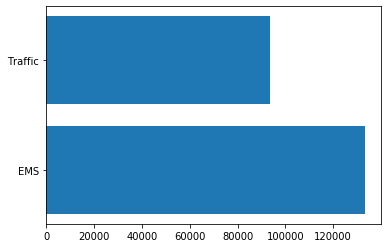

In [6]:
plt.barh(re2.index,re2.values)
plt.show()
#Question 4: How can you plot the bars horizontally ?
#by Changing plt.bar to plt.barh

In [7]:
modf=df
modf['title']=newdf['reason']
modf=modf[modf['title']=='EMS']
hig=modf.groupby('day_of_week').size()
hig.sort_values( ascending=False).head(1)
#Question 5: Which day got maximum calls for EMS and how many?
#as we can see the day is Friday -- 19938

day_of_week
Friday    19938
dtype: int64

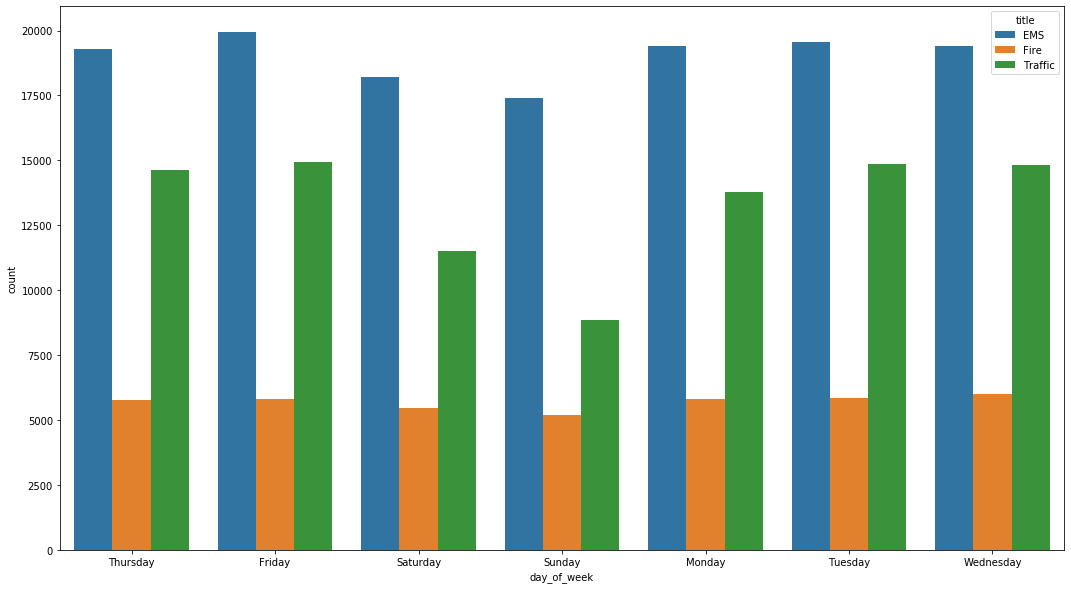

In [8]:
hudf=df
hudf['title']=newdf['reason']
hudf['month']=df['timeStamp'].dt.month
plt.figure(figsize=(18,10))
sns.countplot(x=hudf['day_of_week'],data=hudf,hue='title')
plt.show()
#Question 6: On which day traffic calls were lowest ?
#as we can see on Sunday

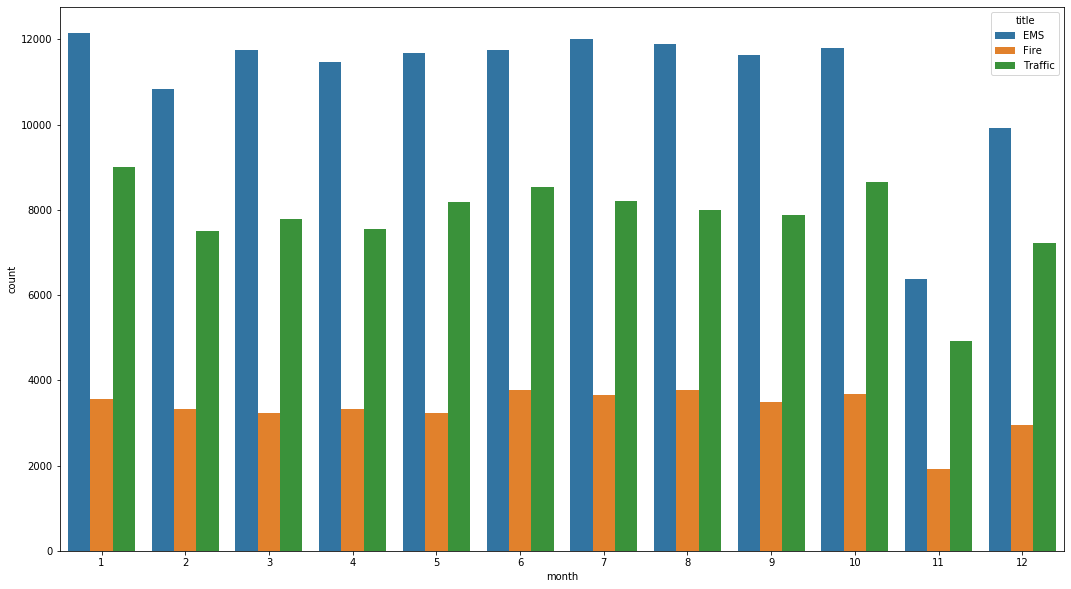

In [9]:
plt.figure(figsize=(18,10))
sns.countplot(x=hudf['month'],data=hudf,hue='title')
plt.show()
#Question 7: Which month saw highest calls for fire?
#as we can see the month is June

In [22]:
hudf=hudf[hudf['title']=='Traffic']
lt=list(hudf['lat'])
lo=list(hudf['lng'])
zp=list(hudf['zip'])
map=fl.Map(location=[39.997054,-75.212293],zoom_start=10,tittle='911 map')
fg=fl.FeatureGroup(name='traffic call')
for LT,LO,ZP in zip(lt,lo,zp):
    fg.add_child(fl.Marker(location=[LT,LO],popup='the zip code {}'.format(ZP),icon=fl.Icon(color='red')))
map.add_child(fg)
map.save('trafic_map.html')
#Question 8: Why some areas seem to have lower or almost zero traffic calls?
#as we can see These are areas like Airport, State Park etc.